Importing the data for training and testing

In [6]:
import pandas as pd
import glob
 
# Load all files
#file_paths = glob.glob("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final/*.csv")
 
# Select 4 venues for training
train_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ylläs_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Serena_final.csv",
                "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ruka_final.csv"]
train_dfs = [pd.read_csv(f) for f in train_venues]
 
# Combine into one training dataset
df_train = pd.concat(train_dfs, ignore_index=True)
 
# Select 1 venue for testing
test_venue = "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
print(df_train.shape, df_test.shape)  # Check sizes

(29587, 8) (7305, 8)


<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:18: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:18: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\2673594115.py:8: SyntaxWarning: invalid escape sequence '\C'
  train_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ylläs_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\2673594115.py:9: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184

In [7]:
df_train.head(10)

,Date,Precipitation amount [mm],Snow depth [cm],Average temperature [°C],cloud_cover_code,Direct solar radiation mean [W/m2],days_above_10cm,days_above_20cm
0,2005-01-02,5.2,39.0,-1.9,1.0,1.1,1,1
1,2005-01-03,1.2,39.0,-2.0,8.0,0.7,2,2
2,2005-01-04,-1.0,39.0,-7.9,9.0,1.8,3,3
3,2005-01-05,2.4,39.0,-6.7,8.0,1.8,4,4
4,2005-01-06,0.8,40.0,-6.7,8.0,1.7,5,5
5,2005-01-07,4.2,40.0,-5.7,7.0,0.9,6,6
6,2005-01-08,-1.0,40.0,-6.4,8.0,1.3,7,7
7,2005-01-09,-1.0,38.0,-6.2,8.0,1.3,8,8
8,2005-01-10,1.4,38.0,-5.8,7.0,2.1,9,9
9,2005-01-11,-1.0,39.0,-0.5,8.0,1.3,10,10


Fill in the values thata are null

In [8]:
df_train.fillna(method="ffill", inplace=True)

df_test.fillna(method="ffill", inplace=True)
 

C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\3689902241.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train.fillna(method="ffill", inplace=True)
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\3689902241.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.fillna(method="ffill", inplace=True)


Divide the columns into features and target

In [9]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

Train the model, predict and calculate the metrics to see how well the model works

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
 
# Create a polynomial regression model (degree=3)
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
# Train the model
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")  # Lower MAE & higher R² is better

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"Mean Absolute Error (MAE): {mae:.2f} cm")
print(f"Mean Squared Error (MSE): {mse:.2f} cm²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} cm")
print(f"R² Score: {r2:.3f}")

MAE: 10.536765826234115, R²: 0.4546694207494334
Mean Absolute Error (MAE): 10.54 cm
Mean Squared Error (MSE): 236.56 cm²
Root Mean Squared Error (RMSE): 15.38 cm
R² Score: 0.455


Save the trained model 

In [11]:
import joblib
 
# Save the trained model
joblib.dump(model, "polynomial_regression_snow_model.pkl")
 
# Load the model later for predictions
loaded_model = joblib.load("polynomial_regression_snow_model.pkl")

Load the 5 venues and make a graph

In [12]:
# Load the remaining 5 venue datasets
remaining_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Mustavaara_final.csv",
                    "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Pyhätunturi_final.csv"]
df_remaining = pd.concat([pd.read_csv(f) for f in remaining_venues], ignore_index=True)
 
# Fill missing values
df_remaining.fillna(method="ffill", inplace=True)
df_remaining.fillna(method="bfill", inplace=True)
 
# Predict snow depth for these venues
df_remaining["Predicted Snow Depth [cm]"] = loaded_model.predict(df_remaining[features])
 
# Save the results
df_remaining.to_csv("predicted_snow_conditions.csv", index=False)
 
print(df_remaining.head())  # Check predictions

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\1434393574.py:2: SyntaxWarning: invalid escape sequence '\C'
  remaining_venues = ["C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\1434393574.py:3: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv",
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\1434393574.py:4: SyntaxWarning: invalid escape sequence '\C'
  "C:\Code\miniproject_2\WeatherMachi

         Date  cloud_cover_code  Precipitation amount [mm]  Snow depth [cm]  \
0  2005-01-02               3.0                        4.2             15.0   
1  2005-01-03               3.0                        0.8             19.0   
2  2005-01-04               3.0                        1.8             19.0   
3  2005-01-05               3.0                        6.2             20.0   
4  2005-01-06               3.0                        5.0             27.0   

   Average temperature [°C]  Direct solar radiation mean [W/m2]  \
0                       0.2                                 1.1   
1                      -1.4                                 0.7   
2                      -1.8                                 1.8   
3                      -1.5                                 1.8   
4                      -1.3                                 1.7   

   days_above_10cm  days_above_20cm  Predicted Snow Depth [cm]  
0                1                0                  13.2

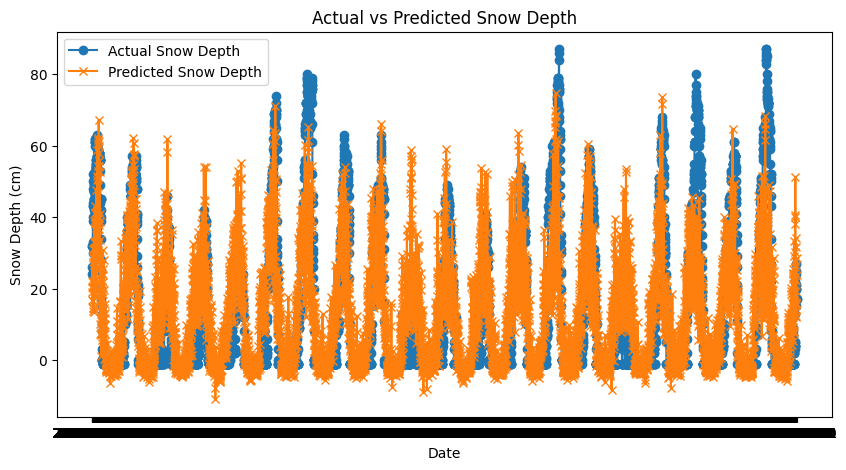

In [13]:
import matplotlib.pyplot as plt
 
# Plot actual vs predicted snow depth
plt.figure(figsize=(10, 5))
plt.plot(df_test["Date"], y_test, label="Actual Snow Depth", marker='o')
plt.plot(df_test["Date"], y_pred, label="Predicted Snow Depth", marker='x')
 
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Actual vs Predicted Snow Depth")
plt.legend()
#plt.xticks(rotation=45)
plt.show()

The places seperatly

In [14]:
# Load one model at the time
df_lahti = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv")
df_vuokatti = pd.read_csv('C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv')
df_mustavaara = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Mustavaara_final.csv")
df_pyhäntunturi = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Pyhätunturi_final.csv")

dfs = [df_lahti,df_mustavaara,df_pyhäntunturi,df_vuokatti] 
# Fill missing values
for df in dfs:
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    df["Predicted Snow Depth [cm]"] = loaded_model.predict(df[features])
 
# Predict snow depth for these venues
#df_lahti["Predicted Snow Depth [cm]"] = loaded_model.predict(df_lahti[features])
 
# Save the results
#df_lahti.to_csv("predicted_snow_conditions.csv", index=False)
 
#print(df_lahti.head())  # Check predictions

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\660013494.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_lahti = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Lahti_final.csv")
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\660013494.py:3: SyntaxWarning: invalid escape sequence '\C'
  df_vuokatti = pd.read_csv('C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Vuokatti_final.csv')
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\660013494.py:4: SyntaxWarning: invalid escape sequence '\C'
  df_mustav

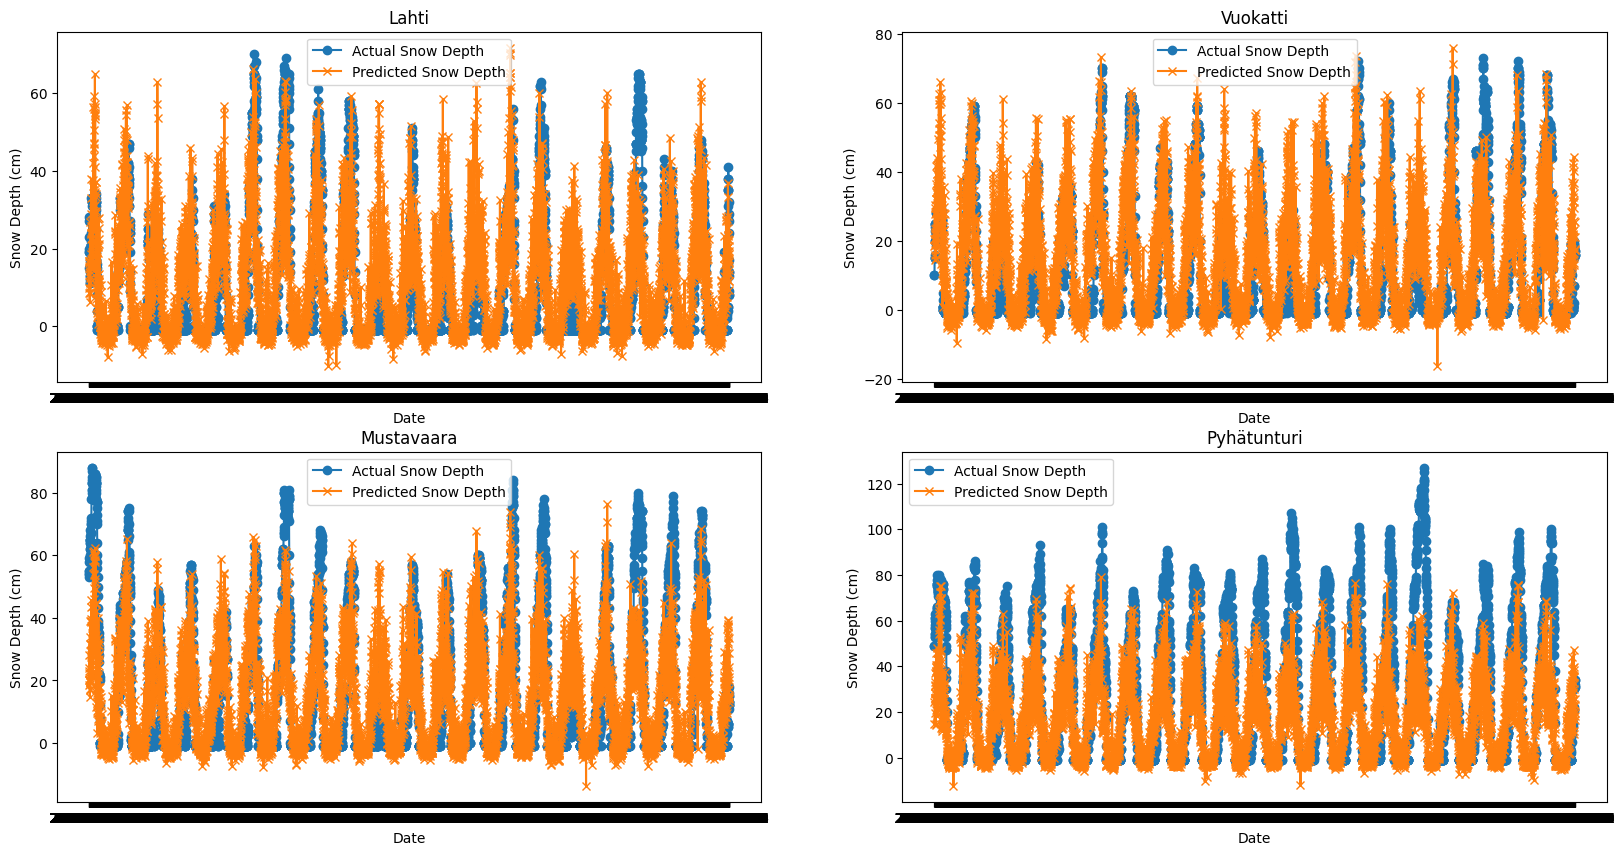

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)  # (rows, columns, index)
plt.plot(df_lahti["Date"], df_lahti['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
plt.plot(df_lahti["Date"], df_lahti['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Lahti")
plt.legend()

plt.subplot(2, 2, 2)  # (rows, columns, index)
plt.plot(df_vuokatti["Date"], df_vuokatti['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
plt.plot(df_vuokatti["Date"], df_vuokatti['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Vuokatti")
plt.legend()

plt.subplot(2, 2, 3)  # (rows, columns, index)
plt.plot(df_mustavaara["Date"], df_mustavaara['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
plt.plot(df_mustavaara["Date"], df_mustavaara['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Mustavaara")
plt.legend()

plt.subplot(2, 2, 4)  # (rows, columns, index)
plt.plot(df_pyhäntunturi["Date"], df_pyhäntunturi['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
plt.plot(df_pyhäntunturi["Date"], df_pyhäntunturi['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Pyhätunturi")
plt.legend()

plt.show()



In [16]:
df_himos = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv")
df_ruka = pd.read_csv('C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ruka_final.csv')
df_tahko = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Tahko_final.csv")
df_ylläs = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ylläs_final.csv")
df_serena = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Serena_final.csv")

dfs = [df_himos, df_ruka, df_tahko, df_ylläs, df_serena]
name = ['Himos' ,'Ruka', 'Tahko', 'Ylläs', 'Serena'] 
# Fill missing values
for df in dfs:
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    df["Predicted Snow Depth [cm]"] = loaded_model.predict(df[features])

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\3025959805.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_himos = pd.read_csv("C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Himos_final.csv")
C:\Users\HannaJohansson\AppData\Local\Temp\ipykernel_19184\3025959805.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_ruka = pd.read_csv('C:\Code\miniproject_2\WeatherMachine\Data cleaning\Final_merge\Final\Ruka_final.csv')
C:\Users\HannaJohansson\AppData\Loca

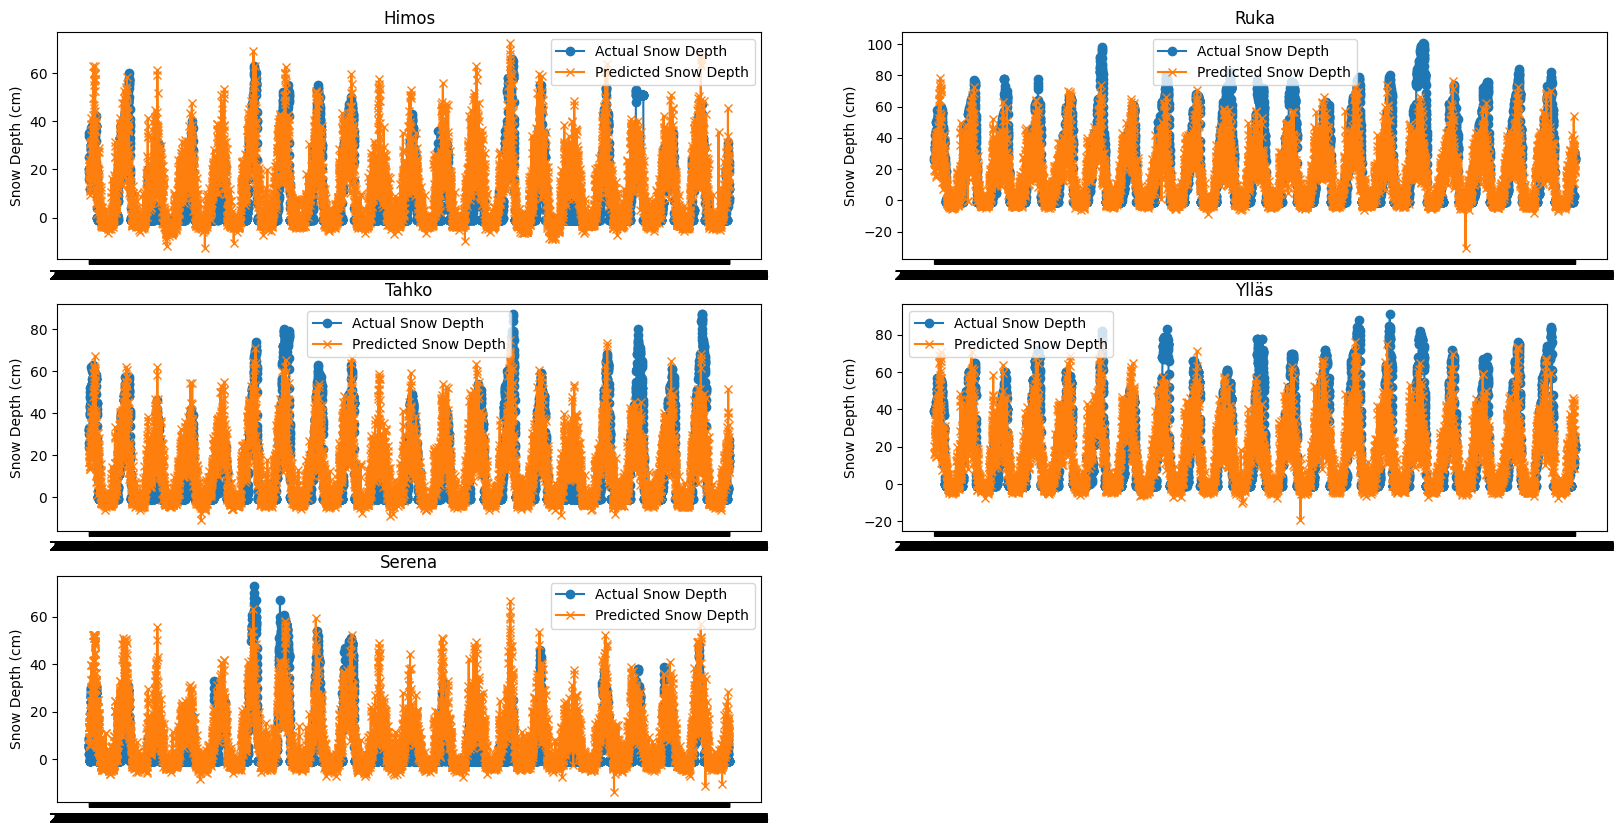

In [17]:
plt.figure(figsize=(20, 10))

i = 1
for df in dfs:
    plt.subplot(3, 2, i)  # (rows, columns, index)
    plt.plot(df["Date"], df['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
    plt.plot(df["Date"], df['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
    #plt.xlabel("Date")
    plt.ylabel("Snow Depth (cm)")
    plt.title(name[i-1])
    plt.legend()
    i += 1

plt.show()

In [1]:
correlation_matrix = dfs.corr()

NameError: name 'dfs' is not defined

ValueError: x and y must have same first dimension, but have shapes (20,) and (7305,)

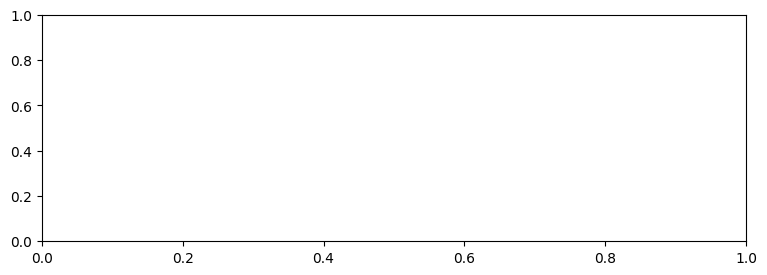

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 10))
years = np.arange(2005, 2025)
i = 1
for df in dfs:
    plt.subplot(3, 2, i)  # (rows, columns, index)
    plt.plot(years, df['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
    plt.plot(years, df['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
    #plt.xlabel("Date")
    plt.ylabel("Snow Depth (cm)")
    plt.title(name[i-1])
    plt.legend()
    i += 1

plt.show()

Looking at the biggest errors and least errors 

In [ ]:
df_test["Prediction Error"] = abs(y_test - y_pred)
df_test_sorted = df_test.sort_values("Prediction Error", ascending=False)
 
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].head(10))
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].tail(10))

            Date  Snow depth [cm]  Prediction Error
4841  2018-04-05             84.0         72.336748
6993  2024-02-25             85.0         72.150908
6991  2024-02-23             85.0         70.498069
6990  2024-02-22             87.0         69.722229
6992  2024-02-24             80.0         65.661413
6994  2024-02-26             78.0         65.344190
2281  2011-04-02             76.0         65.036143
4842  2018-04-06             75.0         64.198215
6988  2024-02-20             84.0         63.711868
2280  2011-04-01             77.0         62.692152
            Date  Snow depth [cm]  Prediction Error
6703  2023-05-11             -1.0          0.012098
5367  2019-09-13             -1.0          0.011916
2685  2012-05-10             -1.0          0.009639
6018  2021-06-25             -1.0          0.008329
2049  2010-08-13             -1.0          0.008201
3801  2015-05-31             -1.0          0.006677
1717  2009-09-15             -1.0          0.006474
7222  2024-1

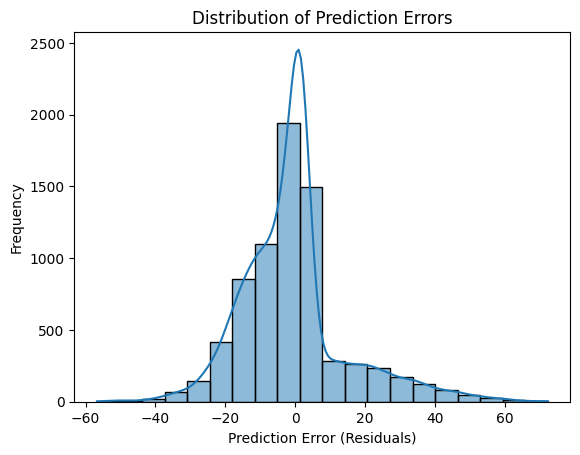

In [ ]:
import seaborn as sns
 
residuals = y_test - y_pred  # Difference between actual and predicted

sns.histplot(residuals, bins=20, kde=True)

plt.xlabel("Prediction Error (Residuals)")

plt.ylabel("Frequency")

plt.title("Distribution of Prediction Errors")

plt.show()
 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
 
# Select features (X) and target variable (y)
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]
 
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")  # Lower MAE & higher R² is better

MAE: 9.193027143834945, R²: 0.4386243143704852
